<a href="https://colab.research.google.com/github/nisrinalifa/Analisis-Data-Dicoding/blob/main/Proyek_Analisis_Data_Nisrina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nisrina Alifa Adzahra
- **Email:** nisrinalifa@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Penyewaan sepeda terbanyak di kondisi cuaca dan musim apa?
- Penyewaan sepeda terbanyak pada hari apa dalam satu minggu?
- Penyewaan sepeda terbanyak ada di jam berapa per hari nya?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('https://raw.githubusercontent.com/nisrinalifa/Analisis-Data-Dicoding/refs/heads/main/Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('https://raw.githubusercontent.com/nisrinalifa/Analisis-Data-Dicoding/refs/heads/main/Bike-sharing-dataset/hour.csv')

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


cnt: count of total rental bikes including both casual and registered

dteday : date

**Insight:**
- day.csv memiliki 16 kolom
- hour.csv memiliki 17 kolom

### Assessing Data

#### Day

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#### Hour

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Tidak ada missing value
- secara keseluruhan data sudah baik
- Kolom dteday harus ubah tipedata ke datetime

### Cleaning Data

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- tipe data kolom 'dteday' pada day_df dan hour_df sudah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Day

In [13]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
# Musim dengan penyewa tertinggi
season_max = day_df.groupby('season')['cnt'].max().sort_values(ascending = False)
print(season_max)

season
3    8714
4    8555
2    8362
1    7836
Name: cnt, dtype: int64


In [15]:
# Cuaca dengan penyewa tertinggi
weather_max = day_df.groupby('weathersit')['cnt'].max().sort_values(ascending = False)
print(weather_max)

weathersit
1    8714
2    8362
3    4639
Name: cnt, dtype: int64


In [16]:
# Rata-rata penyewaan berdasarkan hari dalam seminggu
weekday_max = day_df.groupby('weekday')['cnt'].mean().sort_values(ascending = False)
print(weekday_max)

weekday
5    4690.288462
4    4667.259615
6    4550.542857
3    4548.538462
2    4510.663462
1    4338.123810
0    4228.828571
Name: cnt, dtype: float64


In [17]:
# Rata-rata penyewaan per hari
day_max = day_df['cnt'].mean()
print(day_max)

4504.3488372093025


In [18]:
# Rata-rata penyewaan berdasarkan musim dan cuaca
sewa_season_weather = day_df.groupby(['season', 'weathersit'])['cnt'].mean().sort_values(ascending = False)
print(sewa_season_weather)

season  weathersit
3       1             5878.257353
2       1             5548.548673
3       2             5222.479167
4       1             5043.563107
        2             4654.000000
2       2             4236.705882
1       1             2811.135135
3       3             2751.750000
1       2             2357.166667
4       3             1961.600000
2       3             1169.000000
1       3              934.750000
Name: cnt, dtype: float64


### Explore Hour

In [19]:
hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [20]:
# Jam dengan penyewaan tertinggi
rush_hour = hour_df.groupby('hr')['cnt'].max().sort_values(ascending = False)
print(rush_hour)

hr
18    977
17    976
8     839
16    783
12    776
13    760
14    750
15    750
19    743
11    663
7     596
21    584
20    567
10    539
22    502
9     426
0     283
23    256
6     213
1     168
2     132
3      79
5      66
4      28
Name: cnt, dtype: int64


In [21]:
# Rata-rata jam penyewaan tertinggi berdasarkan bulan dan cuaca
hour_month_weather = hour_df.groupby(['mnth', 'weathersit', 'hr'])['cnt'].mean().sort_values(ascending = False).reset_index()
print(hour_month_weather)

     mnth  weathersit  hr         cnt
0       7           2  17  757.333333
1       9           1  17  670.300000
2      10           1  17  653.571429
3       6           1  17  623.348837
4       8           1  17  620.755556
..    ...         ...  ..         ...
860     3           3   4    3.000000
861     2           2   4    2.500000
862     6           3   3    2.500000
863     2           1   4    2.300000
864     1           3   4    1.857143

[865 rows x 4 columns]


**Insight:**
- Rata-rata penyewaan per hari adalah 4504 unit
- Penyewaan tertinggi adalah pada Bulan September dengan cuaca cerah, pada jam 17 (jam 5 sore)
- Jam penyewaan tertinggi secara keseluruhan adalah jam 18 (jam 6 sore)
- Hari Sabtu adalah hari dengan rata-rata penyewaan terbanyak

### Merge

In [34]:
hour_df.sample(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4338,4339,2011-07-04,3,0,7,16,1,1,0,1,0.82,0.7424,0.41,0.0000,236,216,452
571,572,2011-01-26,1,0,1,0,0,3,1,2,0.22,0.2273,0.69,0.1343,3,14,17
7981,7982,2011-12-04,4,0,12,5,0,0,0,1,0.26,0.3030,0.81,0.0000,2,2,4
12559,12560,2012-06-12,2,1,6,12,0,2,1,3,0.66,0.6061,0.83,0.2537,19,76,95
12576,12577,2012-06-13,2,1,6,5,0,3,1,1,0.60,0.5606,0.83,0.1940,2,38,40
6861,6862,2011-10-18,4,0,10,11,0,2,1,2,0.60,0.6212,0.49,0.1045,35,112,147
11894,11895,2012-05-15,2,1,5,19,0,2,1,1,0.66,0.6212,0.69,0.1642,57,455,512
705,706,2011-02-01,1,0,2,18,0,2,1,2,0.24,0.2576,0.81,0.1045,3,165,168
4186,4187,2011-06-28,3,0,6,8,0,2,1,1,0.70,0.6667,0.79,0.1642,39,417,456
14874,14875,2012-09-16,3,1,9,23,0,0,0,1,0.54,0.5152,0.68,0.1045,9,85,94


In [27]:
all_df = pd.merge(
    left = day_df,
    right = hour_df,
    how = 'left',
    left_on = 'instant',
    right_on = 'instant'
)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dteday_x      731 non-null    datetime64[ns]
 2   season_x      731 non-null    int64         
 3   yr_x          731 non-null    int64         
 4   mnth_x        731 non-null    int64         
 5   holiday_x     731 non-null    int64         
 6   weekday_x     731 non-null    int64         
 7   workingday_x  731 non-null    int64         
 8   weathersit_x  731 non-null    int64         
 9   temp_x        731 non-null    float64       
 10  atemp_x       731 non-null    float64       
 11  hum_x         731 non-null    float64       
 12  windspeed_x   731 non-null    float64       
 13  casual_x      731 non-null    int64         
 14  registered_x  731 non-null    int64         
 15  cnt_x         731 non-null    int64     

In [43]:
# Rata-rata penyewaan terbanyak berdasarkan musim dan cuaca
all_df.groupby(['season_x', 'weathersit_x'])['cnt_x'].mean().sort_values(ascending = False)

season_x  weathersit_x
3         1               5878.257353
2         1               5548.548673
3         2               5222.479167
4         1               5043.563107
          2               4654.000000
2         2               4236.705882
1         1               2811.135135
3         3               2751.750000
1         2               2357.166667
4         3               1961.600000
2         3               1169.000000
1         3                934.750000
Name: cnt_x, dtype: float64

In [53]:
all_df.groupby('weekday_x')['cnt_x'].mean().sort_values(ascending = False)

,cnt_x
weekday_x,
5,4690.288462
4,4667.259615
6,4550.542857
3,4548.538462
2,4510.663462
1,4338.123810
0,4228.828571


In [54]:
all_df.groupby('hr')['cnt_y'].mean().sort_values(ascending = False)

,cnt_y
hr,
17,133.151515
8,123.838710
18,119.687500
19,85.156250
9,84.483871
16,83.727273
13,73.281250
15,72.968750
12,71.812500


## Visualization & Explanatory Analysis

### Pertanyaan 1: Penyewaan sepeda terbanyak di kondisi cuaca dan musim apa?

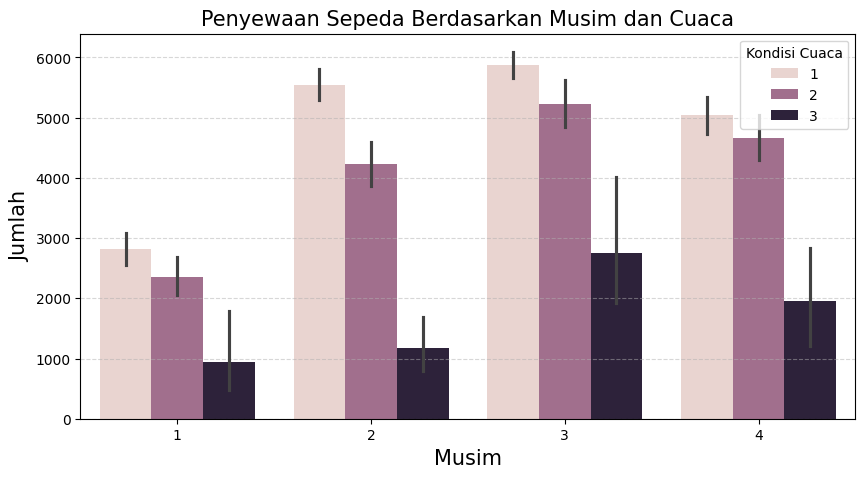

In [45]:
# Visualisasi Penyewaan sepeda terbanyak di kondisi cuaca dan musim apa?
plt.subplots(figsize=(10, 5))
sns.barplot(x='season_x', y='cnt_x', data=all_df, hue='weathersit_x')
plt.legend(title='Kondisi Cuaca', loc='upper right')
plt.title('Penyewaan Sepeda Berdasarkan Musim dan Cuaca', fontsize = 15)
plt.xlabel('Musim', fontsize = 15)
plt.ylabel('Jumlah', fontsize = 15)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### Pertanyaan 2: Penyewaan sepeda terbanyak pada hari apa dalam satu minggu?

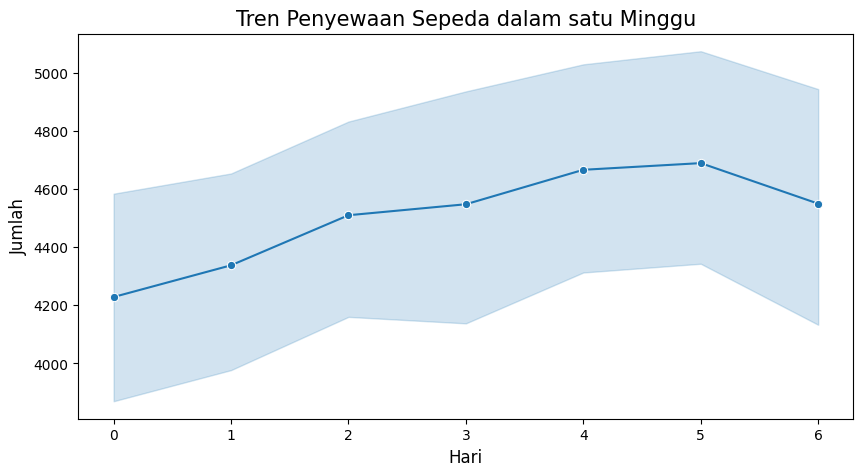

In [48]:
# Visualisasi Penyewaan sepeda terbanyak pada hari apa?
plt.figure(figsize=(10, 5))
sns.lineplot(x=all_df.weekday_x, y=all_df.cnt_x, marker = 'o')
plt.title('Tren Penyewaan Sepeda dalam satu Minggu', fontsize=15)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

### Pertanyaan 3: Jam dengan penyewaan tertinggi

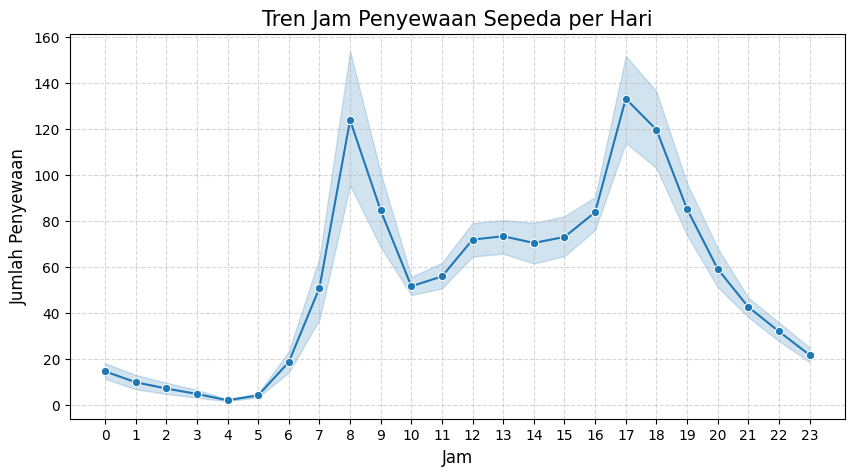

In [52]:
# Visualisasi Penyewaan sepeda terbanyak pada hari apa?
plt.figure(figsize=(10, 5))
sns.lineplot(x=all_df['hr'], y=all_df['cnt_y'], marker='o')
plt.title('Tren Jam Penyewaan Sepeda per Hari', fontsize=15)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.show()


**Insight:**
- Musim dengan rata-rata penyewaan sepeda terbanyak adalah musim gugur-cuaca cerah sebanyak 5878, disusul dengan musim panas-cuaca cerah sebanyak 5548,  musim dingin-cuaca berkabut sebanyak 5043, dan musim semi-cuaca cerah sebanyak 2811
- Puncak penyewaan sepeda terbanyak adalah hari sabtu sebanyak 4690, tren kembali menurun di hari minggu dan kembali naik pada hari selasa
- Penyewaan sepeda paling tinggi di jam 17 sebanyak 133 yang kemungkinan adalah jam pulang kerja, disusul oleh jam 8 sebanyak 123 yang kemungkinan adalah jam berangkat sekolah

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 = Penyewaan sepeda terbanyak di kondisi cuaca dan musim apa?
  - Musim dengan rata-rata penyewaan sepeda terbanyak adalah ***Musim Gugur - Cuaca Cerah sebanyak 5878***, disusul dengan musim panas-cuaca cerah sebanyak 5548, musim dingin-cuaca berkabut sebanyak 5043, dan musim semi-cuaca cerah sebanyak 2811
  - Pemilik usaha dapat memperbanyak jumlah persediaan sepeda pada musim gugur

- Conclution pertanyaan 2 = Penyewaan sepeda terbanyak pada hari apa dalam satu minggu?
  - Puncak penyewaan sepeda terbanyak adalah hari ***Sabtu sebanyak 4690***, tren menurun di hari minggu dan kembali naik pada hari selasa
  - Pemilik usaha dapat memperbanyak jumlah persediaan sepeda pada hari sabtu
  - Kemungkinan tren menurun pada hari minggu karena hari minggu merupakan hari libur

- Conclusion pertanyaan 3 = Jam dengan penyewaan tertinggi
  - Penyewaan sepeda paling tinggi di ***jam 17 sebanyak 133*** yang kemungkinan adalah jam pulang kerja, disusul oleh ***jam 8 sebanyak 123*** yang kemungkinan adalah jam berangkat sekolah
  - Pemilik usaha dapat memperbanyak jumlah persediaan sepeda pada pagi dan sore hari, terutama jam 17 dan 8
  - Terlihat tren menaik pada pagi hari mulai dari jam 5 dan pada sore hari mulai dari jam 15. Dan mulai menaik secara signifikan pada pagi hari jam 6 dan pada sore hari jam 16

In [55]:
all_df.to_csv("all_data.csv", index=False)

In [ ]:
!pip freeze > requirements.txt